# GS Algorithm

This notebook contains the problems which are solved with the Diffraction Tool

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import PhaseTypeHologram
from DiffractionTool import PatternGenerator
from DiffractionTool import HelperFunctions as hp

## Problems

As shown in the figure above, a 632.8nm laser beam is incident on a 200 micron diameter phase type hologram.
And the transmitted light forms an image of $500\mu m*500\mu m$ at $z=400\mu m$ (the image content is customized).
Combined with angular spectrum method or Rayleigh-Sommerfeld diffraction, the GS algorithm shall be built to optimize the following two cases of hologram phase distributions. Upload code and report which includes the deserved phase distribution and detailed analysis.
1. Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$
2. Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$
3. Compare the differences between the two cases and analyze the reasons

<img src="https://github.com/yesunhuang/Optics_Toolbox_In_Python/blob/6738af360a3f9c9bf34ffd43a9751a1bcbfd55ff/notebooks/imgs/Prob5.png" width="50%">

<img src="imgs/Prob5.png" width="50%">

#### Paramters

In [5]:
N_size=3335
#μm plane [1000,1000]μm 
interval=0.3
waveLambda=0.6328
z=400
k=2.0*pi/waveLambda
actualSize=N_size*interval
xyInterval=[interval]*2
hologramRadius=100

#### Original Image

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")
filename='maki.png'

In [7]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
imgActualSize=500
imgNSize=grayImg.shape[0]
grayImg=grayImg/np.max(np.abs(grayImg))

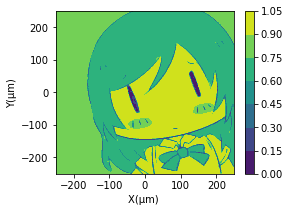

In [8]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

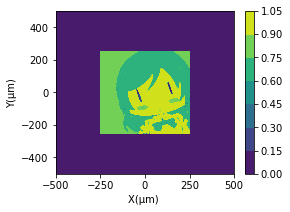

In [9]:
padSize=int((actualSize/(imgActualSize)*imgNSize-imgNSize)/2)
targetImg=cv2.copyMakeBorder(grayImg,padSize,padSize,padSize,padSize,cv2.BORDER_CONSTANT,value=0)
targetImg=cv2.resize(targetImg,(N_size,N_size))
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

In [10]:
'''
PTest=PatternGenerator(N_size,xyInterval,pattern='rect')
targetImg=hp.intensity(PTest.generate([200,200]))
''';

In [11]:
'''
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)
''';

In [12]:
print(targetImg.shape)

(3335, 3335)


### Hologram Pattern

In [13]:
shape=PatternGenerator(N_size,xyInterval,pattern='circle')

In [14]:
hologramShape=shape.generate([hologramRadius])

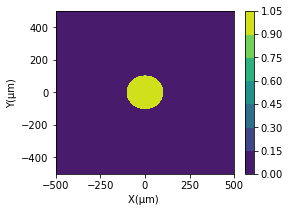

In [15]:
hp.displace_2d(hp.intensity(hologramShape),labels,range);

### Sub problem 1

Phase distribution when the pixel cell size of the hologram is $0.3\mu m *0.3\mu m$.

In [16]:
#parameters
pixelSize=[0.3]*2

In [17]:
hologramP1=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [18]:
loss=hologramP1.get_hologram(z,k,hologramShape,targetImg,epoches=50,epochStep=5)

Epoch [5/50], loss: 0.117345, time: 431.860416s
Epoch [10/50], loss: 0.111526, time: 114.591672s
Epoch [15/50], loss: 0.106337, time: 115.297264s
Epoch [20/50], loss: 0.102076, time: 113.779194s
Epoch [25/50], loss: 0.098097, time: 111.538962s
Epoch [30/50], loss: 0.093027, time: 111.694047s
Epoch [35/50], loss: 0.087271, time: 112.230940s
Epoch [40/50], loss: 0.081795, time: 112.039771s
Epoch [45/50], loss: 0.078690, time: 112.317228s
Epoch [50/50], loss: 0.079204, time: 112.344799s


Results

In [19]:
result=hologramP1.apply_hologram(z,k,hologramShape)

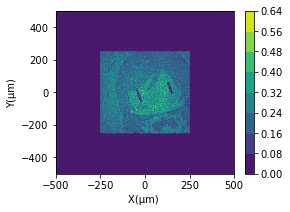

In [20]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

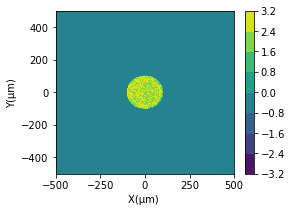

In [21]:
hp.displace_2d(hologramP1.get_hologram_phase_distribution(),labels,range)

### Sub problem 2

Phase distribution when the pixel cell size of the hologram is $2.0\mu m *2.0\mu m$

In [22]:
#parameters
pixelSize=[2.0]*2

In [23]:
hologramP2=PhaseTypeHologram(N_size,xyInterval,pixelSize,hologramShape)

GS

In [24]:
loss=hologramP2.get_hologram(z,k,hologramShape,targetImg,epoches=50,epochStep=5)

Epoch [5/50], loss: 0.136203, time: 428.425496s
Epoch [10/50], loss: 0.135892, time: 115.263499s
Epoch [15/50], loss: 0.135016, time: 115.642543s
Epoch [20/50], loss: 0.134897, time: 113.969170s
Epoch [25/50], loss: 0.134410, time: 114.235012s
Epoch [30/50], loss: 0.134668, time: 114.591215s
Epoch [35/50], loss: 0.135530, time: 114.277586s
Epoch [40/50], loss: 0.134789, time: 115.886472s
Epoch [45/50], loss: 0.135795, time: 118.493237s
Epoch [50/50], loss: 0.135461, time: 114.412824s


Results

In [25]:
result=hologramP2.apply_hologram(z,k,hologramShape)

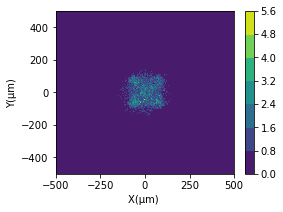

In [26]:
hp.displace_2d(hp.intensity(result),labels,range);

Hologram phase distribution

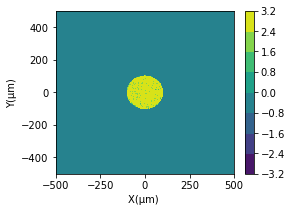

In [28]:
hp.displace_2d(hologramP2.get_hologram_phase_distribution(),labels,range)

### Sub problem 3

Compare the differences between the two cases and analyze the reasons

Answer: When the pixel size is too large, the result image is very rough. The reason is that the GS algorithm is not able to capture the phase distribution of the hologram and does not converge due to the roughness of pixel. So it might be better to use a small pixel size.
To get a better understanding of the result, we try to explain it in a more detailed way.
* If the pixel size is too large, the allowed space frequency range is small and thus leads to discarding the high space frequency components of the desired hologram distribution. Also, the sampling frequency interval will be large. Accoding to the Shannon sampling theorem, in order to recover the signal of the target image, the sampling interval must fulfill that $d\leq 1/\Delta x$, where $\Delta x$ is the size of the target image. Otherwise, the image will be distorted due to the overlap of frequency spectrums.
* If we view the hologram as a composition of optical gratings. According to the grating equation: 
$d sin\theta=k\lambda$.
If $d$ is large, the spectrum of different diffracted orders will tend to concentrate in a small area and thus resulting in a overlap of the diffracted light from the gratings of which the phase hologram is composed. 